# Smoothing a spiky well log

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scripts.las import LASReader
from past.builtins import basestring    # pip install future

%  matplotlib inline

In [11]:
data_dir = './data/'
logfile = 'Well_A.las'
filename = data_dir + logfile

In [12]:
well = LASReader(filename, null_subs=np.nan)

In [13]:
first_z = np.amin(well.data['DEPT'])
last_z = np.amax(well.data['DEPT'])


DT = well.data['DT']
DEPTH = well.data['DEPT']

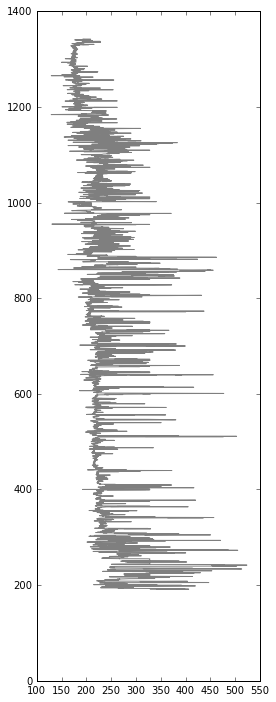

In [16]:
plt.figure(figsize = (4,12))
plt.plot(DT,DEPTH,'k-', alpha=0.5)
plt.show()

In [18]:
interval = 36
DT_sm = np.convolve(DT, np.ones(interval)/interval)

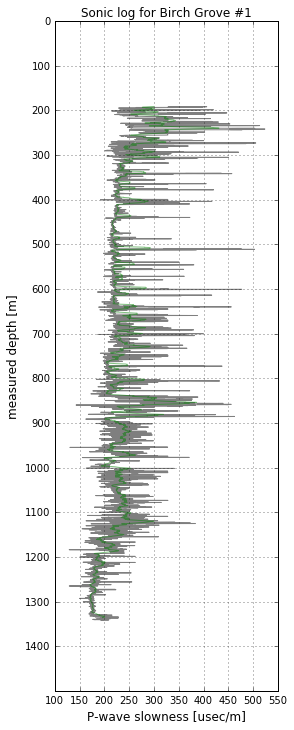

In [19]:
plt.figure(figsize = (4,12))
plt.plot(DT,DEPTH,'k-', DT_sm[interval-1:], DEPTH,'g', alpha=0.5)
plt.title('Sonic log for Birch Grove #1')
plt.ylabel('measured depth [m]', fontsize = '12' )
plt.xlabel('P-wave slowness [usec/m]', fontsize = '12')

plt.ylim(0,1500)
plt.yticks(np.arange(0,1500,100))
plt.gca().invert_yaxis()
plt.grid()

# Regional Time-Depth pairs

In [23]:
RegionalTD = np.array([[0,850,2000,5000],[0,0.5,1.0,2.0]])

### Integrate sonic to get travel time (cumulative slowness)

In [25]:
CumTT = 2*np.cumsum( 0.1524*np.nan_to_num(DT)/1000000.0 )

CumTT_sm = 2*np.cumsum( 0.1524*np.nan_to_num(DT_sm)/1000000.0 )

CumTT_sm_shift = 0.12+2*np.cumsum( 0.1524*np.nan_to_num(DT_sm)/1000000.0 )

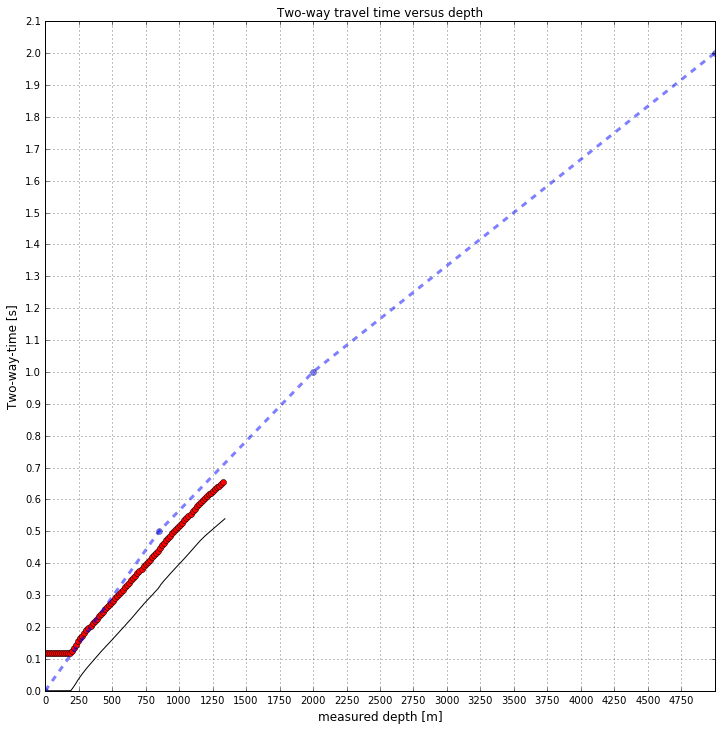

In [26]:
plt.figure(figsize = (12,12))
plt.plot(DEPTH, CumTT, 'k')
plt.plot(DEPTH[::100], CumTT_sm_shift[interval-1::100],'ro')
plt.plot(RegionalTD[0], RegionalTD[1],'o--', alpha = 0.5, lw=3)
plt.title('Two-way travel time versus depth')
plt.xlabel('measured depth [m]', fontsize = '12' )
plt.ylabel('Two-way-time [s]', fontsize = '12')

plt.xticks(np.arange(0,5000,250))
plt.yticks(np.arange(0,2.2,0.1))
plt.grid()